# Palmer Penguins
**Author: A. O'Connor**
**************
This notebook contains my own analysis of the Palmer Penguins dataset. Palmer Penguins is a famous data set available on [Github](https://allisonhorst.github.io/palmerpenguins/). It will be loaded into this notebook for data visualisation and exploration. It contains data from 344 penguins, collected at the Palmer Research Station in Antarctica. 
**************

### Import Libraries
The Pandas library will be used for interpretation and analysis of the data set.\
The Matplotlib pyplot library will be used for plotting the data.
*************

In [1]:
# Data frames: Install pandas
# pandas is a Python library for interpreting and analysing data frames, imported from Anaconda the python interpreter.  
# pd will be the command to access pandas 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load the data set
The Palmer Penguins data set will be loaded from [GitHub]("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"), using Pandas to read in the raw csv file. 
***************

In [2]:
# Load the penguins dataset using pandas read_csv() function
df = pd.read_csv ("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

### Overview of the data
Initially, view the the data frame and the summary statistics of the overall data set, to get an idea of the data that we'll be working with.
**********

In [3]:
# View the data frame
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
#Summary statistics of the data frame:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


#### Information about the data frame
**********
The Palmer Penguins data set contains 344 rows and 7 columns.\
These column contain various data types. 
- Variables in the columns bill length, bill depth, flipper length and body mass are all numeric with multiple decimal places, therefore they  are the float data type. They are stored in the Pandas data frame as DType Float64. 
- Variables in the columns species, island and sex are all strings (e.g. sex can be "Male" or "Female".). In Pandas data frames, strings are by default stored as the object data type. 

2 values in the columns bill length, bill depth, flipper length and body mass and 1 value in the column sex are missing.



### Cleaning The Data 
Using Pandas to drop the NaN or empty cells.\
From a Pandas tutorial on [W3 Schools.](https://www.w3schools.com/python/pandas/pandas_cleaning_empty_cells.asp)
**************

In [6]:
#The function dropna() in pandas creates a new data frame with any rows that have missing values removed 
#Using the argument inplace = True will replace the original data frame
#Here, lets keep the original dataframe as is, and create a new one. 
df_cleaned_empty_rows = df.dropna()

In [7]:
#Use the df.info() function to double check no null cells remain
df_cleaned_empty_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


### Correlations
Using Pandas to view the correlations in the data.\
Pandas returns a correlation matrix of numeric columns.\
From a Pandas tutorial on [W3 Schools.](https://www.w3schools.com/python/pandas/pandas_correlations.asp)
**************

In [8]:
#Create a numeric data frame from the overall data frame using the function select_dtypes and specifying to include numeric columns. 
#Reference for this: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
df_numeric = df_cleaned_empty_rows.select_dtypes(include = ('number'))
df_numeric.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


This correlation matrix describes the relationship between each numeric column in the data frame, represented as an R value ranging from -1 to +1.\
Negative numbers represent a negative correlation between the two variables (i.e. as one number increases the other decreases), and positive numbers represent a positive correlation. The closer the R value is to zero, the less strong the correlation. In the Palmer Penguibns data set, the following correlations are worth noting:
- Flipper length is positively correlated with bill depth, R value of 0.65.
- Body mass is also positively correlated with bill depth, though less strong a correlation with an R value of 0.59.
- The strongest correlation exists between body mass and flipper length, with an R value of 0.87. 

### Plot the data
****

Plotting the data using the Pandas .plot()  method
****

<Axes: ylabel='Frequency'>

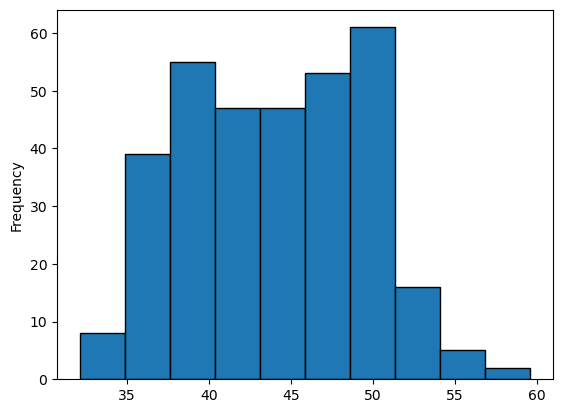

In [9]:
df_cleaned_empty_rows["bill_length_mm"].plot(kind="hist", edgecolor = "black")

<Axes: ylabel='Frequency'>

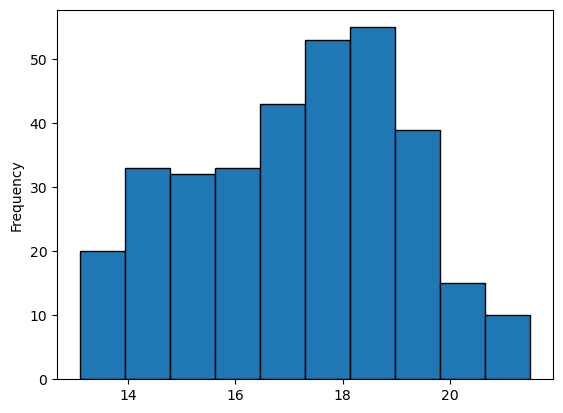

In [10]:
df_cleaned_empty_rows["bill_depth_mm"].plot(kind="hist", edgecolor = "black")

Text(0.5, 1.0, 'Body Mass vs Flipper Length: Palmer Penguins')

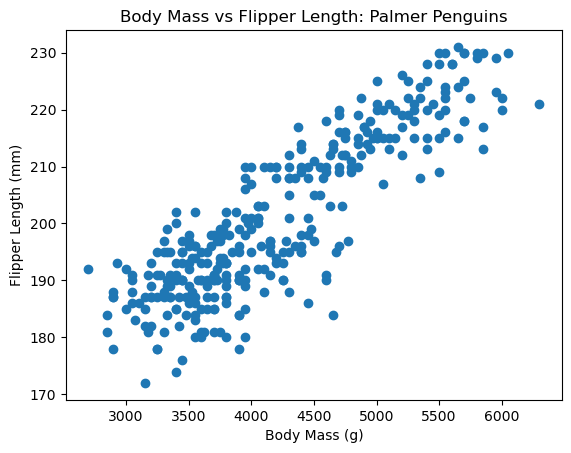

In [18]:
fig, ax = plt.subplots()

ax.plot(df_cleaned_empty_rows["body_mass_g"], df_cleaned_empty_rows["flipper_length_mm"], "o")

ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Flipper Length (mm)")
ax.set_title("Body Mass vs Flipper Length: Palmer Penguins")


In [19]:
# The best fit line: 
m, c = np.polyfit(
        x = df_cleaned_empty_rows["body_mass_g"], 
        y = df_cleaned_empty_rows["flipper_length_mm"], 
        deg = 1
                  ) 

Text(0.5, 1.0, 'Body Mass vs Flipper Length: Palmer Penguins')

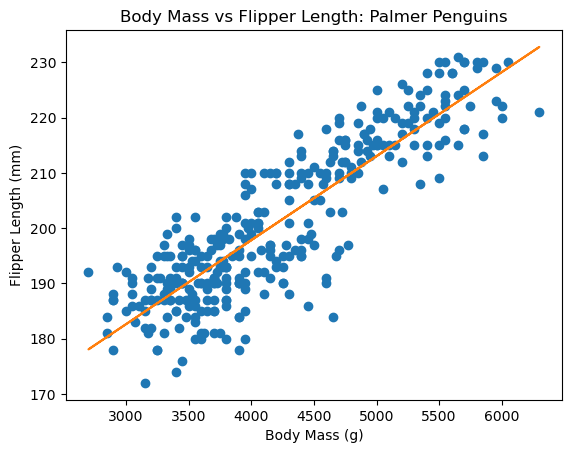

In [24]:
fig, ax = plt.subplots()

ax.plot(df_cleaned_empty_rows["body_mass_g"], df_cleaned_empty_rows["flipper_length_mm"], "o")
ax.plot(df_cleaned_empty_rows["body_mass_g"], m*df_cleaned_empty_rows["body_mass_g"]+c)
ax.set_xlabel("Body Mass (g)")
ax.set_ylabel("Flipper Length (mm)")
ax.set_title("Body Mass vs Flipper Length: Palmer Penguins")
